# Statistics Tutorial - Lesson 4
# Covariance and Correlation Coefficient

Covariance and Correlation Coefficient are measures of correlation or joint variability of two data sets.

## Covariance

[Covariance](https://en.wikipedia.org/wiki/Covariance) is defined as the average of products of each data set's difference with its own mean, i.e.
$$ cov(X, Y) = E[(X - \overline{X})(Y - \overline{Y})] $$

When two data sets have the same tendency, the covariance is positive; When two data sets have the opposite tendency, the covariance is negative. However, the magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables. 

Covariance can be also be derived as the difference between the mean of two data sets' product and the product of two data sets' means, i.e.
$$ cov(X, Y) = E[XY] - E[X]E[Y] $$

The formula can also be equivalently expressed without using mean:
$$ cov(X, Y) = \frac{1}{n^{2}}\sum_{i=1}^{}\sum_{j>i}^{}(x_i - x_j)(y_i - y_j) $$

In [1]:
# Example 1
def get_mean(given_list):
    """
    Function for calculating arithmetic mean
    """
    return sum(given_list)/len(given_list)
def get_cov_1(list1, list2):
    """
    Function for calculating covariance (formula 1)
    """
    mean1 = get_mean(list1)
    mean2 = get_mean(list2)
    return get_mean([(x - mean1) * (y - mean2) for (x, y) in zip(list1, list2)])
def get_cov_2(list1, list2):
    """
    Function for calculating covariance (formula 2)
    """
    part1 = get_mean([x * y for (x, y) in zip(list1, list2)])
    part2 = get_mean(list1) * get_mean(list2)
    return part1 - part2
def get_cov_3(list1, list2):
    """
    Function for calculating covariance (formula 3)
    """
    n = len(list1)
    temp_sum = 0
    for i in range(0, n):
        for j in range(i+1, n):
            temp_sum += (list1[i] - list1[j])*(list2[i] - list2[j])
    return temp_sum / n**2

price1 = [492, 509, 522, 538, 528, 527, 543]
price2 = [51.25, 52.3, 52.35, 53.9, 52.65, 52.6, 55.1]

cov1 = get_cov_1(price1, price2)
cov2 = get_cov_2(price1, price2)
cov3 = get_cov_3(price1, price2)
print('Covariance (Method 1): {:.2f}'.format(cov1))
print('Covariance (Method 2): {:.2f}'.format(cov2))
print('Covariance (Method 3): {:.2f}'.format(cov3))

Covariance (Method 1): 16.66
Covariance (Method 2): 16.66
Covariance (Method 3): 16.66


In [2]:
# Example 2
# by NumPy
import numpy as np
price1_array = np.array(price1)
price2_array = np.array(price2)
cov = np.cov(price1_array, price2_array, bias=True)
print('Covariance: {:.2f}'.format(float(cov[0][1])))

Covariance: 16.66


## Correlation Coefficient

[Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is a ratio between the covariance of two data sets and the product of their standard deviations. As the measure is normalized, the value is always between -1 and 1. The calculation is defined as:
$$ \rho_{x,y} = \frac{cov(X, Y)}{\sigma_x \sigma_y} $$

When two data sets have the same tendency, the correlation coefficient tends to 1; When two data sets have the opposite tendency, the value tends to -1.

In [3]:
# Prepare another data set with opposite tendency
price3 = [0.45, 0.44, 0.43, 0.42, 0.44, 0.43, 0.40]
price3_array = np.array(price3)

In [4]:
# Example 1
import math

def get_sd(given_list):
    """
    Function for calculating standard deviation
    """
    mean = get_mean(given_list)
    return math.sqrt(get_mean([math.pow(x - mean, 2) for x in given_list]))
def get_corr(list1, list2):
    """
    Function for calculating correlation coefficient
    """
    return get_cov_1(list1, list2) / (get_sd(list1) * get_sd(list2))

corr1 = get_corr(price1, price2)
corr2 = get_corr(price1, price3)
print('Correlation Coefficient (#1): {:.2f}'.format(corr1))
print('Correlation Coefficient (#2): {:.2f}'.format(corr2))

Correlation Coefficient (#1): 0.89
Correlation Coefficient (#2): -0.85


In [5]:
# Example 2
# by NumPy
corr1 = np.corrcoef(price1_array, price2_array)
corr2 = np.corrcoef(price1_array, price3_array)
print('Correlation Coefficient (#1): {:.2f}'.format(float(corr1[0][1])))
print('Correlation Coefficient (#2): {:.2f}'.format(float(corr2[0][1])))

Correlation Coefficient (#1): 0.89
Correlation Coefficient (#2): -0.85


## Pair Grid

In addition to observe measure values, visualization is another method to observe the relationship of data sets.

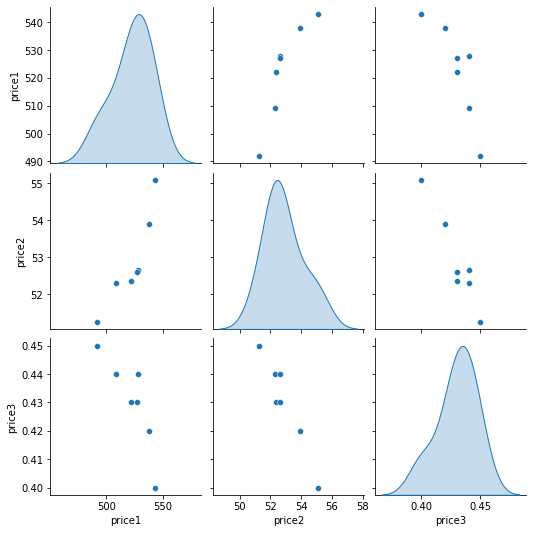

In [6]:
import pandas as pd
import seaborn as sb

# Load previous data sets into Data Frame
df = pd.DataFrame(
    {
        'price1': price1
        , 'price2': price2
        , 'price3': price3
    }
)

sb.pairplot(df, diag_kind='kde')

The plot consists of two types of graphs: the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a certain data set while the scatter plots show the relationship between two data set. 

As shown in the above example, you can observe central tendency in the diagonal historgrams. Price 1 and Price 2 have same trends while Price 1 and Price 3 have opposite trend.